In [28]:
# Let's first examine the contents of the uploaded ASCII file to understand its structure and data format.
file_path = r'MFM Analysis/MFM_DATA/MFM/FP3136D - SC+FM (10 K)/12) FP3136D - SC+FM (10 K, sat -300 mT, lift 60 nm, 100 mT).asc'

# Read the file and output the first few lines to get a sense of its structure.
with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the first few lines to understand the file format
lines[:10]


['# File Format = ASCII\n',
 '# Created by Gwyddion 2.60\n',
 '# Original file: C:\\Users\\attocube\\Desktop\\Data\\MFM data\\2024-05-06 to (sup-spin)\\MFM\\run 9\\FP3136D - SC+FM (2 K)\\10) FP3136D - SC+FM (2 K, sat -300 mT, lift 60 nm, 100 mT).asc\n',
 '# x-pixels = 256\n',
 '# y-pixels = 256\n',
 '# x-length = 7999.9999999999991\n',
 '# y-length = 7999.9999999999991\n',
 '# x-offset = 5000\n',
 '# y-offset = 5000\n',
 '# Bit2nm = 1.0\n']

[[-0.52877887 -0.42177284 -0.42752693 ... -0.55088679 -0.53070068
  -0.48816319]
 [-0.36485418 -0.32502309 -0.29792618 ... -0.43998757 -0.43994988
  -0.42240573]
 [-0.24076058 -0.21553918 -0.17411246 ... -0.35272042 -0.36670551
  -0.42820774]
 ...
 [ 0.11893068  0.10178593  0.15570499 ... -0.60840427 -0.70731619
  -0.7846041 ]
 [ 0.06884055  0.01979492  0.0899418  ... -0.58407964 -0.67824221
  -0.75566859]
 [-0.00628105 -0.01143833 -0.08909393 ... -0.50769461 -0.46266704
  -0.51591646]]


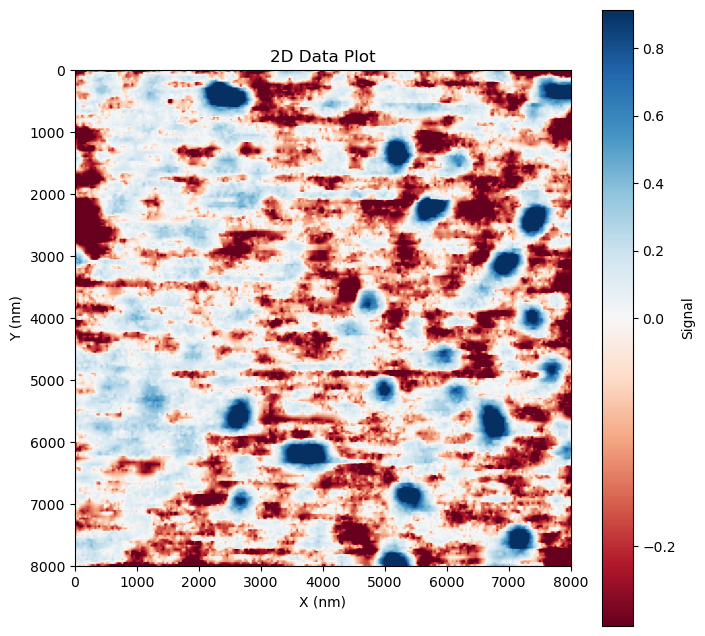

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# Extract the relevant metadata
x_pixels = int(lines[3].split('=')[1].strip())
y_pixels = int(lines[4].split('=')[1].strip())
x_length = float(lines[5].split('=')[1].strip())
y_length = float(lines[6].split('=')[1].strip())

# The data should start after the header, which seems to be 10 lines long
data = np.loadtxt(file_path, skiprows=10)
print(data)
# Ensure the data is of the expected shape
data = data.reshape((x_pixels, y_pixels))
divnorm=colors.TwoSlopeNorm(vmin=data.min()/3, vcenter=0, vmax=data.max()/3)

# Create the plot
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[0, x_length, 0, y_length], origin='lower', cmap='RdBu', norm = divnorm)
plt.colorbar(label='Signal')
plt.title('2D Data Plot')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')
plt.gca().invert_yaxis()
plt.show()
